<h3>Import Basic Libraries</h3>

In [6]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# Import libraries required for timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [8]:
# Import KERAS:TimeseriesGenerator
# This class produces time series batches used on training/testing the model

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import KERAS:MinMaxScaler
# This class is used to preprocess (scale) the data

from sklearn.preprocessing import MinMaxScaler

<h3>Data Set: Ross Stores, Inc. (ROST); Time Period:Jan 1, 2020 - Feb 28, 2022</h3>

In [9]:
# Selecting the dataset
dataset_path = "ROSS_STOCK_PREDICTION_01012020-02282022.csv"

In [10]:
# Creating a dataframe called df_ALL

df_ALL = pd.read_csv(dataset_path)

In [11]:
# Load the first five rows

df_ALL.head()

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15


<h3>Exploratory Data Analysis (EDA)</h3>

In [12]:
# Count Variables and data points

df_ALL.shape

(544, 2)

In [13]:
# Identify the data types of variables

df_ALL.dtypes

,0
Date,object
Close,float64


In [14]:
# Summary Statistics

df_ALL.describe()

,Close
count,544.000000
mean,107.595239
std,14.565670
min,59.970000
25%,93.867500
50%,112.175000
75%,119.497500
max,132.960000


In [15]:
# Select only the Closing Price for analysis

df = df_ALL.iloc[:,0:2]

In [16]:
df.head()

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15


<Axes: >

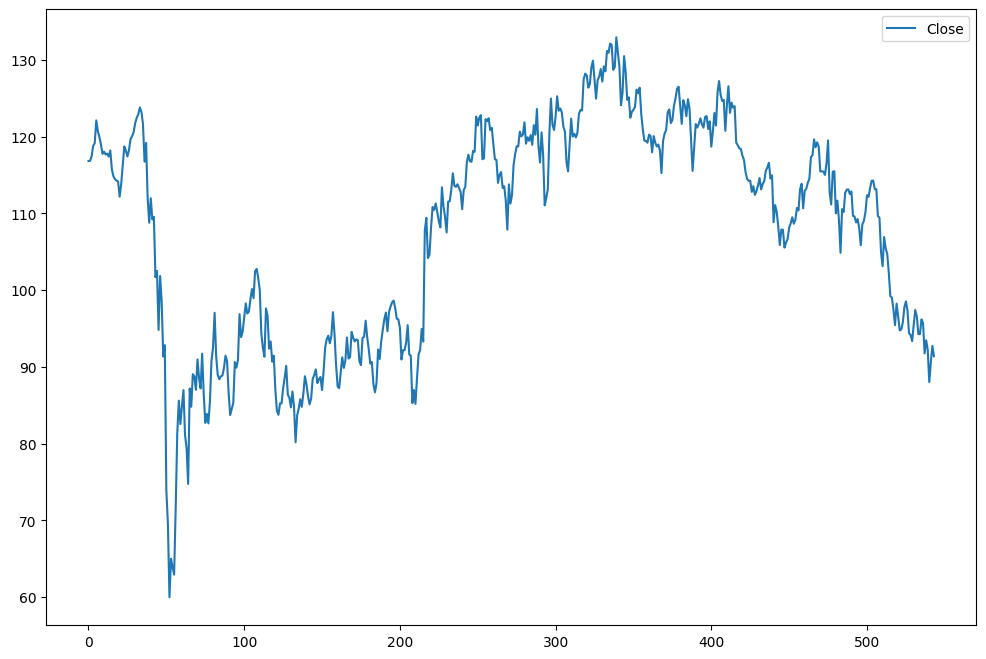

In [17]:
# Plot Closing Price

df.plot(figsize=(12,8))

<h3>Length of Input Time Series - Number of Input Time Steps</h3>

In [18]:
# Set the length of the input sequence
# Here we are using 40 consecutive closing prices to predict the next one

length50= 50

In [19]:
length50

50

<h3>Time Series Dataset: Train/Test Split</h3>

In [20]:
len(df)

544

In [21]:
# Set percentage of data used for testing, 20% reserved for testing

test_percent = 0.2

In [22]:
# Number of data points reserved for testing the model

len(df)*test_percent

108.80000000000001

In [23]:
# Round the test data points to the nearest decimal

test_length = np.round(len(df)*test_percent)
test_length

109.0

In [24]:
# Index of the testing data

split_index = int(len(df)-test_length)
split_index

435

In [25]:
# Training Dataset, 80% reserved for training data

data_train = df.iloc[: split_index]

# Testing Dataset
# All the indicies from (split_index - length50) to the end of the dataframe
# split_index - length50: Need the last 50 historical data points (belong to data_train) to predict the first data point of the data_test

data_test = df.iloc[split_index - length50 :]


In [26]:
#Load training data first 5 rows
data_train.head()

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15


In [27]:
#Load training data last 5 rows
data_train.tail()

,Date,Close
430,9/16/2021 16:00,113.65
431,9/17/2021 16:00,114.62
432,9/20/2021 16:00,113.13
433,9/21/2021 16:00,113.83
434,9/22/2021 16:00,114.19


In [28]:
#Load testing data first 5 rows
data_test.head()

,Date,Close
385,7/14/2021 16:00,124.89
386,7/15/2021 16:00,123.70
387,7/16/2021 16:00,119.49
388,7/19/2021 16:00,115.54
389,7/20/2021 16:00,118.59


In [29]:
#Load testing data last 5 rows
data_test.tail()

,Date,Close
539,2/22/2022 16:00,92.24
540,2/23/2022 16:00,88.02
541,2/24/2022 16:00,90.64
542,2/25/2022 16:00,92.73
543,2/28/2022 16:00,91.39


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [30]:
# Create a MinMaxScaler to normalize the data

scaler = MinMaxScaler()

In [31]:
# Train the scaler to perform the normalization (for training data only)

scaler.fit(data_train[['Close']])

MinMaxScaler()

In [32]:
# Normalize the training dataset

normalized_train = scaler.transform(data_train[['Close']])

# Normalize the testing dataset

normalized_test = scaler.transform(data_test[['Close']])

<h3>Create TimeseriesGenerator for Training</h3>

In [33]:
# TimeseriesGenerator: Generate Time Series batches for training/testing
# Length is 45
# Batch size: Number of time series samples in each batch

batch_size22 = 22

# Creating a TimeseriesGenerator for Training

train_tsGenerator45 = TimeseriesGenerator(normalized_train, normalized_train, length=length50, batch_size=batch_size22)

In [34]:
# Length of the normalized training dataset

len(normalized_train)

435

In [35]:
len(train_tsGenerator45)

18

In [36]:
# Check the first batch

X,y = train_tsGenerator45[0]

In [37]:
print(X)

[[[0.77901082]
  [0.77942184]
  [0.78723113]
  ...
  [0.52870256]
  [0.42992191]
  [0.45019866]]

 [[0.77942184]
  [0.78723113]
  [0.80600082]
  ...
  [0.42992191]
  [0.45019866]
  [0.19125908]]

 [[0.78723113]
  [0.80600082]
  [0.810796  ]
  ...
  [0.45019866]
  [0.19125908]
  [0.13138786]]

 ...

 [[0.74270448]
  [0.71544047]
  [0.7379093 ]
  ...
  [0.34032059]
  [0.39841074]
  [0.39416358]]

 [[0.71544047]
  [0.7379093 ]
  [0.77243458]
  ...
  [0.39841074]
  [0.39416358]
  [0.3703247 ]]

 [[0.7379093 ]
  [0.77243458]
  [0.80517879]
  ...
  [0.39416358]
  [0.3703247 ]
  [0.42471571]]]


In [38]:
print (y)

[[0.19125908]
 [0.13138786]
 [0.        ]
 [0.06891355]
 [0.05384299]
 [0.0404165 ]
 [0.15906289]
 [0.29209481]
 [0.35114399]
 [0.30935745]
 [0.34114262]
 [0.36991369]
 [0.28935471]
 [0.26620085]
 [0.20249349]
 [0.37279079]
 [0.34032059]
 [0.39841074]
 [0.39416358]
 [0.3703247 ]
 [0.42471571]
 [0.39169749]]


<h3>Build, Train, and Test Model</h3></n></n><h3>Build LSTM Model</h3>

In [39]:
# We are using only one feature, i.e., Close Price

n_features = 1

In [40]:
# Define model

model = Sequential()

# Add an LSTM layer
# This layer has 50 LSTM cells
# Activation function: relu

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length50, n_features)))

# Dropout Layer

model.add(Dropout(0.2))

# Add 2nd LSTM layer

model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Dropout Layer

model.add(Dropout(0.2))

# Add 3rd LSTM layer

model.add(LSTM(units=50, activation='relu'))

# Add a fully-connected layer for the final prediction

model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h3>Compile Model</h3>

In [41]:
# Compile Model

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

<h3>Train (fit) model using fit_generator()</h3>

In [42]:
# Train the model

model.fit(train_tsGenerator45, epochs=30)

Epoch 1/30
 2/18 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.8618

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.4881
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0333
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0129
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0194
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0226
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0125
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0098
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0240
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0113
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0149
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0121
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0231
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0138
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0128
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0113
Epoch 16/30
1

<h3>Visualize Model's Performance after Training</h3>

In [43]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<Axes: >

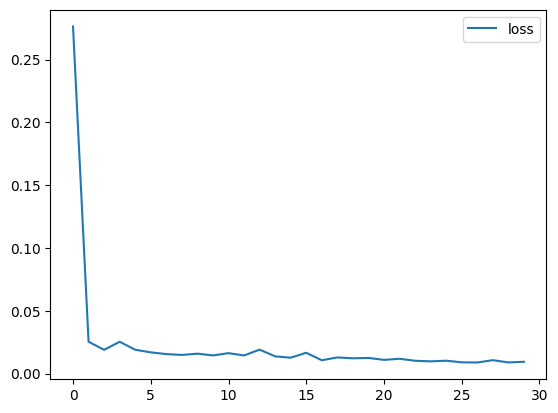

In [44]:
# Load the loss data (model.history.history) into a data frame

ds_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()

ds_model_loss.plot()

<h3>Prediction for Testing: Using TimeseriesGenerator</h3></n></n><h5>Create TimeseriesGenerator for Testing</h5>

In [45]:
# Batch Size is 1

batch_size1 = 1

# Create a TimeseriesGenerator for testing: test_tsGenerator

test_tsGenerator45 = TimeseriesGenerator(normalized_test, normalized_test, length=length50, batch_size=batch_size1)

<h5>Predict Future Data Points for Testing</h5>

In [46]:
normalized_prediction = model.predict(test_tsGenerator45)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [47]:
# Prediction is a numpy 2D array with only one column

normalized_prediction

array([[0.7100208 ],
       [0.71111846],
       [0.7138822 ],
       [0.71821326],
       [0.7230142 ],
       [0.7278323 ],
       [0.7301534 ],
       [0.7301457 ],
       [0.7277993 ],
       [0.722884  ],
       [0.715039  ],
       [0.7055022 ],
       [0.69522196],
       [0.68422973],
       [0.6732208 ],
       [0.66288805],
       [0.6541765 ],
       [0.64763415],
       [0.64360434],
       [0.6417046 ],
       [0.6417025 ],
       [0.64370745],
       [0.6472988 ],
       [0.6528979 ],
       [0.6604672 ],
       [0.66846085],
       [0.67680764],
       [0.68522316],
       [0.6936466 ],
       [0.7020146 ],
       [0.71108   ],
       [0.72089475],
       [0.73188704],
       [0.74341905],
       [0.7551303 ],
       [0.76629585],
       [0.77520865],
       [0.7813117 ],
       [0.78454757],
       [0.7850456 ],
       [0.7838079 ],
       [0.7826073 ],
       [0.77969295],
       [0.7742923 ],
       [0.76811844],
       [0.76204056],
       [0.75463164],
       [0.746

In [48]:
len(normalized_prediction)

109

In [49]:
# Convert normalized predictions back to the true values

prediction = scaler.inverse_transform(normalized_prediction)

In [50]:
# Flatten all the 2D array

prediction_index = np.arange(435, 544, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['Prediction'])

In [51]:
df_prediction

,Prediction
435,111.794418
436,111.874535
437,112.076263
438,112.392387
439,112.742805
...,...
539,96.409302
540,96.259224
541,95.971741
542,95.595764


<h3>Visualize Prediction</h3>

<Axes: >

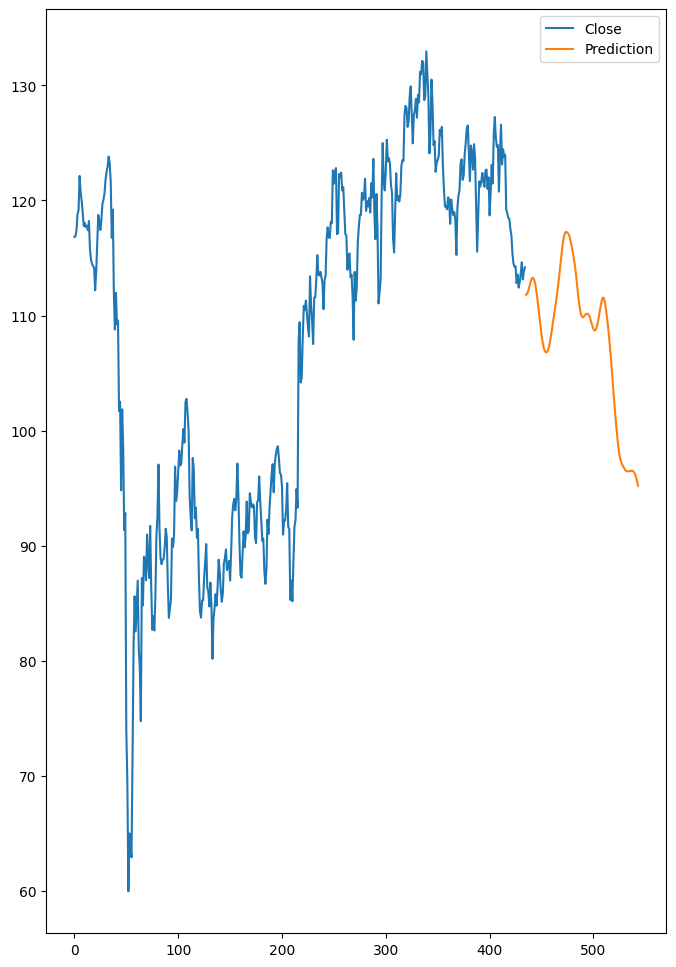

In [52]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Visualize Prediction and Compare Actual Close Price</h3>

<Axes: >

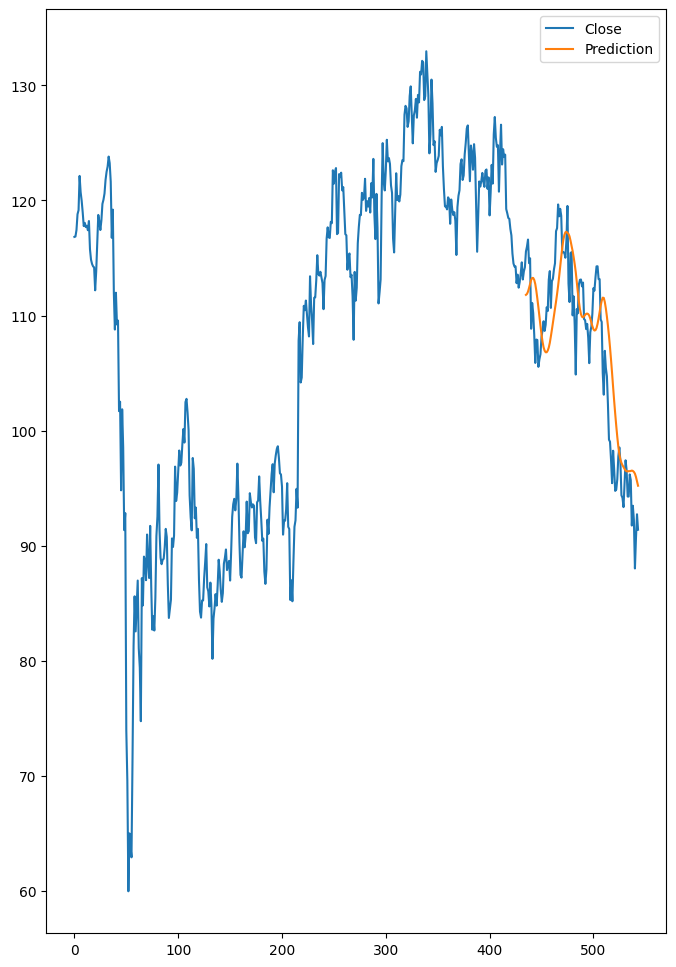

In [53]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Time Series Forecasting with LSTM</h3></n></n><h5>Preprocess Full Input Dataset</h5>

In [54]:
# Using MinMaxScaler to normalize the full dataset df

full_scaler = MinMaxScaler()

normalized_full_data = full_scaler.fit_transform(df[['Close']])

<h3>Create TimeSeriesGenerator for Forecasting</h3>

In [55]:
# Number of steps of the input timeseries

length50

50

In [56]:
# Create Timeseries Generator for forecasting

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length50, batch_size=batch_size22)

<h3>Build, Compile, and fit LSTM Model for Forecasting</h3>

In [57]:
# Train/Fit LSTM Model

model.fit(forecast_tsGenerator, epochs = 30)

Epoch 1/30
 3/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0058

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0083
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0080
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0062
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0052
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0099
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0060
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0069
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0066
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0099
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0057
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0043
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0089
Epoch 13/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0056
Epoch 14/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0084
Epoch 15/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0052
Epoch 16/30
23

<h3>Time Series Forecasting Using LSTM Neural Network </h3>

In [58]:
forecast = []

# Set periods with the time span of forecasting
# Let's forecast for the next 30 business days (03/01/2022-04/11/2022)

periods = 30

first_eval_batch = normalized_full_data[-length50:]
current_batch = first_eval_batch.reshape((1, length50, n_features))

for i in range(periods):

    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])

    current_pred = model.predict(current_batch)[0]

    #store prediction

    forecast.append(current_pred)

    # update batch now include prediction and drop first value

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

<h3>Inverse to Transform Normalized Data Back into True Values</h3>

In [59]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[92.02848372],
       [91.80881828],
       [91.81250101],
       [91.98681422],
       [92.27818531],
       [92.64216262],
       [93.0450055 ],
       [93.46286863],
       [93.87973331],
       [94.28414022],
       [94.66745786],
       [95.02450693],
       [95.35078678],
       [95.64385023],
       [95.90255745],
       [96.12592955],
       [96.31367289],
       [96.46634867],
       [96.58518375],
       [96.6724948 ],
       [96.73136635],
       [96.76529623],
       [96.77796066],
       [96.77356661],
       [96.75643418],
       [96.73007859],
       [96.69766704],
       [96.6628975 ],
       [96.62905898],
       [96.59855732]])

In [60]:
df

,Date,Close
0,1/2/2020 16:00,116.83
1,1/3/2020 16:00,116.86
2,1/6/2020 16:00,117.43
3,1/7/2020 16:00,118.80
4,1/8/2020 16:00,119.15
...,...,...
539,2/22/2022 16:00,92.24
540,2/23/2022 16:00,88.02
541,2/24/2022 16:00,90.64
542,2/25/2022 16:00,92.73


<h3>Creating new timestamp index with pandas</h3>

In [61]:
# Calculate forecast index

forecast_index = np.arange(544, 574, step=1)

In [62]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
544,92.028484
545,91.808818
546,91.812501
547,91.986814
548,92.278185
549,92.642163
550,93.045006
551,93.462869
552,93.879733
553,94.284140


<h3>Plot the Forecast</h3>

<Axes: >

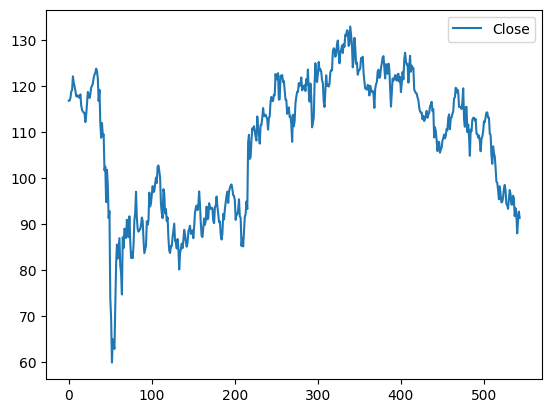

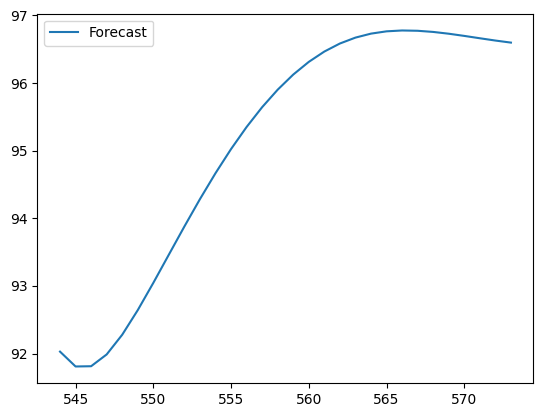

In [63]:
df.plot()
forecast_df.plot()

<h3>Joining Pandas Plots</h3>

<Axes: >

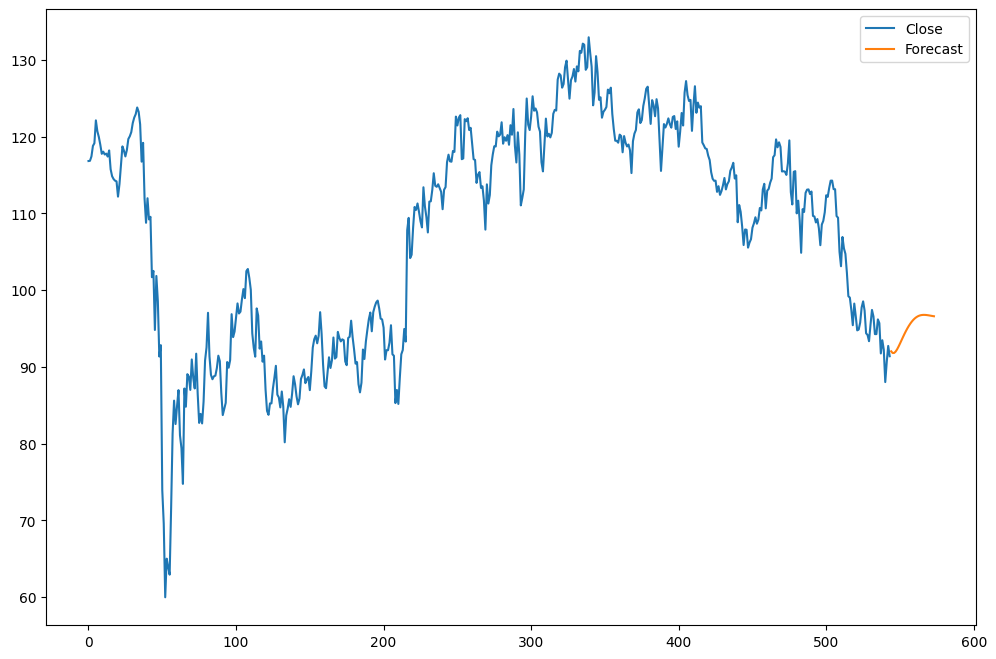

In [64]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))

In [65]:
# Selecting the dataset (actual close price)
dir_path_dataset_2 = "ROSS_STOCK_PREDICTION_03012022-04112022.csv"

In [66]:
# Creating a dataframe called df_ALL_MAR_APR_2022
df_ALL_MAR_APR_2022 = pd.read_csv(dir_path_dataset_2)

In [67]:
# Print the first 5 rows of the dataframe
df_ALL_MAR_APR_2022.head()

,Date,Close
0,1/3/2022 16:00,113.16
1,1/4/2022 16:00,113.16
2,1/5/2022 16:00,109.66
3,1/6/2022 16:00,109.44
4,1/7/2022 16:00,104.99


In [68]:
df_ALL_MAR_APR_2022 = df_ALL_MAR_APR_2022.iloc[:,0:2]
df_ALL_MAR_APR_2022

,Date,Close
0,1/3/2022 16:00,113.16
1,1/4/2022 16:00,113.16
2,1/5/2022 16:00,109.66
3,1/6/2022 16:00,109.44
4,1/7/2022 16:00,104.99
...,...,...
539,2/22/2022 16:00,92.24
540,2/23/2022 16:00,88.02
541,2/24/2022 16:00,90.64
542,2/25/2022 16:00,92.73


<Axes: >

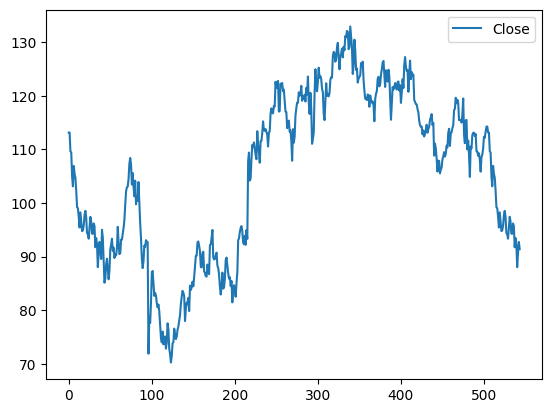

In [69]:
# Plot stock close values
df_ALL_MAR_APR_2022.plot()

In [70]:
forecast_df['Forecast'].values

array([92.02848372, 91.80881828, 91.81250101, 91.98681422, 92.27818531,
       92.64216262, 93.0450055 , 93.46286863, 93.87973331, 94.28414022,
       94.66745786, 95.02450693, 95.35078678, 95.64385023, 95.90255745,
       96.12592955, 96.31367289, 96.46634867, 96.58518375, 96.6724948 ,
       96.73136635, 96.76529623, 96.77796066, 96.77356661, 96.75643418,
       96.73007859, 96.69766704, 96.6628975 , 96.62905898, 96.59855732])

<Axes: >

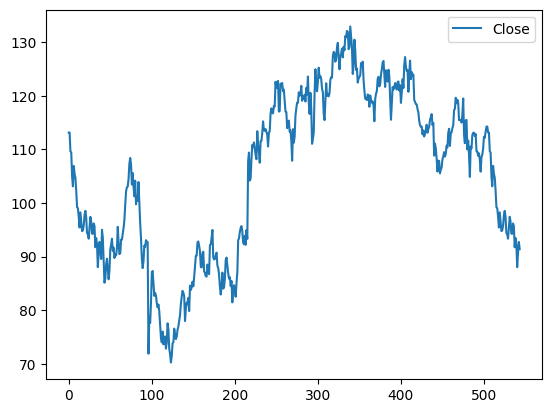

In [71]:
# Plot Actual Close and Forecast
df_ALL_MAR_APR_2022.plot()